# Notebook 2: Procesamiento de imágenes astronómicas

¡Bienvenido! El objetivo principal de este cuaderno es leer imágenes astronómicas y explorar sus características.

## Formato de imagen

Las imágenes monocromáticas («blanco y negro», «escala de grises») son matrices 2D con el valor de intensidad de cada píxel.

Un ejemplo:


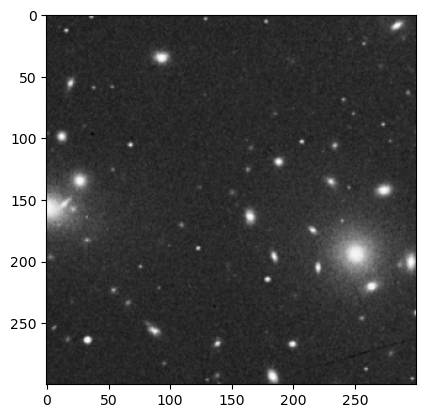

(300, 300)
[[3157. 2969. 2969. ... 3301. 2985. 3143.]
 [2998. 2969. 3918. ... 3301. 2985. 3143.]
 [2682. 2969. 3918. ... 2985. 3301. 3301.]
 ...
 [2784. 3101. 3101. ... 3889. 3256. 2781.]
 [2784. 3101. 3101. ... 3256. 3256. 2781.]
 [3101. 3101. 2784. ... 2939. 3572. 3097.]]


In [2]:
import numpy as np
from astropy.io import fits as fits
import matplotlib.pyplot as plt

# here we show the image / Aquí mostramos la imagen.
image = fits.open('coma_DSSred.fits')
image = np.flipud(image[0].data)
    
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale / Mostrar el resultado filtrado en escala de grises.
plt.imshow(image,origin='lower')


plt.show()

# here we show the size of the image and the actual pixel values
# Aquí mostramos el tamaño de la imagen y los valores reales de los píxeles.

print(image.shape)

print(image)


En el caso de una imagen «en color» (RGB, por ejemplo), para cada color tendríamos una matriz 2D.
<div>
<img src="img/rgbimage.png" width="500"/>
</div>


En astronomía, normalmente no utilizamos colores RGB, sino que observamos a través de una serie de filtros ópticos, cada uno de los cuales cubre una parte del espectro electromagnético. Suelen ser u, g, r, i, z, y o un subconjunto de estos.

<div>
<img src="img/sdssfilters.png" width="500"/>
</div>


## Resaltar características con filtros

La extracción de fuentes en astronomía consiste en identificar y medir objetos dentro de imágenes astronómicas. Esto se realiza con funciones de filtro, funciones matemáticas que pueden resaltar características de los objetos en una imagen que podrían no ser evidentes a simple vista, modificando los valores de los píxeles. A continuación se presenta un resumen de las funciones de filtro más utilizadas:


<div>
<img src="img/meanmaxfilters.png" width="500"/>
</div>




**1. Filtro máximo (Max) y mínimo (Min)**

Un filtro máximo identifica los máximos locales en una imagen comparando cada píxel con sus vecinos.
En el contexto de la extracción de fuentes, los máximos locales se utilizan para encontrar fuentes potenciales.
El filtro máximo se aplica a menudo después de la sustracción del fondo y el filtrado.

Cómo se utilizan los filtros máximos en la extracción de fuentes:

* Detección de fuentes:
El filtro máximo ayuda a identificar los picos de las fuentes, que suelen ser los puntos más brillantes de la imagen.
* Desmezcla:
El filtro máximo se puede utilizar para separar fuentes superpuestas identificando picos distintos dentro de la región mezclada.
* Filtrado:
El filtro máximo se aplica después del filtrado inicial para mejorar aún más el contraste de las fuentes con respecto al fondo.



**2. Filtros medios (Mean)**


El concepto fundamental detrás del filtrado medio es: cada píxel de una imagen se sustituye por el valor medio derivado de los píxeles vecinos confinados dentro de una ventana o núcleo específico. El tamaño de este núcleo determina el grado de suavizado, ya que los núcleos más grandes producen efectos de suavizado más potentes, con el posible coste de una mayor pérdida de detalles.

El filtrado medio ayuda a eliminar las variaciones aleatorias o el ruido presentes en una imagen, al tiempo que conserva sus características esenciales.

Cómo se utilizan los filtros medios en la extracción de fuentes:

* reducción de ruido
* suavizado


**3. Filtro gaussiano (Gauss)**

Al aplicar un núcleo gaussiano, el filtro otorga más peso a los píxeles centrales que a las regiones circundantes, lo que reduce eficazmente el ruido y preserva la estructura de la imagen. El parámetro esencial $\sigma$ controla el alcance del filtro y el suavizado posterior.

El filtrado gaussiano es una herramienta fundamental en el campo del procesamiento de imágenes, especialmente para la reducción de ruido.

**4. Filtro Sobel**

El filtro Sobel (introducido por Irwin Sobel y Gary M. Feldman en 1968) es una herramienta fundamental en el procesamiento de imágenes y la visión artificial. Su objetivo principal es detectar bordes dentro de las imágenes. Al realzar los bordes de las imágenes, el filtro Sobel contribuye de manera significativa a tareas como la detección de objetos, la segmentación de imágenes y la mejora de bordes.



En resumen, los filtros son componentes esenciales de las herramientas de extracción de fuentes, ya que ayudan a identificar los máximos locales en las imágenes y a detectar las fuentes. Se utilizan junto con otras técnicas, como la sustracción de fondo, el filtrado y el umbral, para proporcionar una detección y medición de fuentes robustas.




## Otras consideraciones:

Sustracción del fondo:
Antes de aplicar un filtro máximo, es fundamental sustraer el fondo de la imagen. Esto ayuda a aislar las fuentes de interés del ruido de fondo subyacente.

Umbral (thresholding):
Después de aplicar el filtro máximo, se utiliza una operación de umbral para identificar qué píxeles pertenecen a las fuentes.

Separación:
Una vez detectadas las fuentes, se utilizan algoritmos de separación para separar las fuentes superpuestas.

## Aplicación de filtros mediante programación

La forma en que se aplican estas funciones de filtro es sustituyendo el valor de cada píxel por otro valor que está relacionado de alguna manera con los valores de los píxeles circundantes. Por ejemplo, una función `maxFilter()` podría sustituir el valor de cada píxel por el valor máximo de los píxeles de un cuadro de 3$\times$3 o 5$\times$5 que rodea al píxel (el píxel en sí también se incluye). Una función `minFilter()` haría lo mismo, excepto que sustituiría cada píxel por el valor mínimo del recuadro.

Probamos esto a continuación aplicando filtros a una imagen de entrada.

Para ello, utilizamos el paquete Python `astropy`:

In [3]:
import numpy as np
from astropy.io import fits as fits
import matplotlib.pyplot as plt

image = fits.open('coma_DSSred.fits')
image = np.flipud(image[0].data)
    
print(image.shape)


(300, 300)


Ahora la imagen es solo una matriz `numpy` que se puede indexar como cualquier otra matriz. Se utilizó la función `np.flipup` («voltear arriba-abajo») para que, al mostrar la matriz, tenga la misma orientación que cuando se ve la imagen con visores de imágenes FITS como DS9. Una vez leída la imagen, aplique cada filtro a la imagen y muestre la imagen. 

In [5]:

def maxFilter(im, s):
    xpix, ypix = im.shape
    maxa = np.zeros(im.shape)
    for i in range(int(s[0] / 2), int(xpix - s[0] / 2)):
        for j in range(int(s[1] / 2), int(ypix - s[1] / 2)):
            maxa[i, j] = np.max(im[int(i - s[0] / 2) : int(i + 1 + s[0] / 2), int(j - s[1] / 2) : int(j + 1 + s[1] / 2)])

    return maxa


def minFilter(im, s):
    xpix, ypix = im.shape
    mina = np.zeros(im.shape)
    for i in range(int(s[0] / 2), int(xpix - s[0] / 2)):
        for j in range(int(s[1] / 2), int(ypix - s[1] / 2)):
            mina[i, j] = np.min(im[int(i - s[0] / 2): int(i + 1 + s[0] / 2), int(j - s[1] / 2): int(j + 1 + s[1] / 2)])

    return mina


def medianFilter(im, s):
    xpix, ypix = im.shape
    meda = np.zeros(im.shape)
    for i in range(int(s[0] / 2), int(xpix - s[0] / 2)):
        for j in range(int(s[1] / 2), int(ypix - s[1] / 2)):
            meda[i, j] = np.median(im[int(i - s[0] / 2) : int(i + 1 + s[0] / 2), int(j - s[1] / 2):int(j + 1 + s[1] / 2)])

    return meda


def meanFilter(im, s):
    xpix, ypix = im.shape
    meana = np.zeros(im.shape)
    for i in range(int(s[0] / 2), int(xpix - s[0] / 2)):
        for j in range(int(s[1] / 2), int(ypix - s[1] / 2)):
            meana[i, j] = np.mean(im[int(i - s[0] / 2):int(i + 1 + s[0] / 2), int(j - s[1] / 2):int(j + 1 + s[1] / 2)])

    return meana

Las estamos aplicando a la imagen `image`:

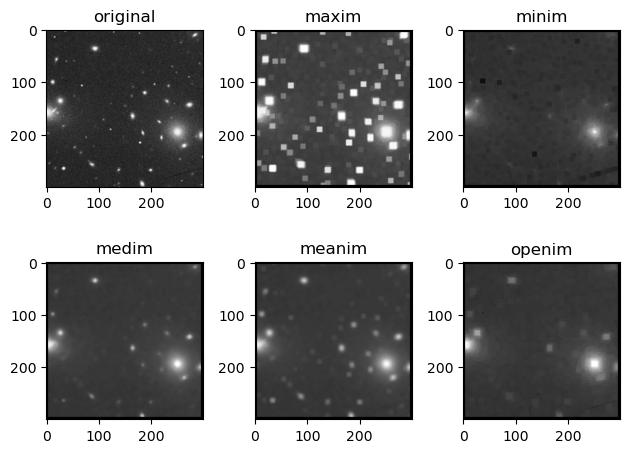

In [6]:
filt = (int(8), int(8))
    
kernel = np.random.normal(size=filt)
maxa = np.zeros((300, 300))
mina = np.zeros((300, 300))
conv_array = np.zeros((300, 300))

maxim = maxFilter(image, filt)
minim = minFilter(image, filt)
openim = maxFilter(minim, filt)
    
medim = medianFilter(image, filt)
meanim = meanFilter(image, filt)

fig, axs = plt.subplots(2, 3)
axs[0,0].imshow(image)
axs[0,0].set_title('original')

axs[0,1].imshow(maxim)
axs[0,1].set_title('maxim')
    
axs[0,2].imshow(minim)
axs[0,2].set_title('minim')

axs[1,0].imshow(medim)
axs[1,0].set_title('medim')
   
axs[1,1].imshow(meanim)
axs[1,1].set_title('meanim')
    
axs[1,2].imshow(openim)
axs[1,2].set_title('openim')

fig.tight_layout()

Hemos establecido el tamaño del filtro en 8$\times$8 píxeles: `filt = (int(8), int(8))`

Puedes intentar modificar el tamaño del filtro y comparar los resultados.



## Uso de bibliotecas de programas: `ndimage`

Hasta ahora, hemos escrito nuestras propias funciones para los filtros.
Este es un buen enfoque para ver en detalle cómo funcionan.
Sin embargo, filtros como los anteriores, y muchos más, están disponibles a través del paquete `ndimage` que importamos desde la biblioteca `scipy` (https://docs.scipy.org/doc/scipy/reference/ndimage.html).

Este paquete contiene varias funciones para el procesamiento de imágenes multidimensionales.

Aquí aplicamos un filtro máximo con un tamaño de núcleo (kernel size) de 20 a nuestros datos astronómicos:

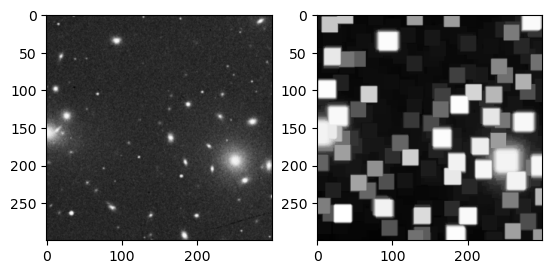

In [8]:
from scipy import ndimage

image = fits.open('coma_DSSred.fits')
image = np.flipud(image[0].data)

#here we apply the maximum filter
result = ndimage.maximum_filter(image, size=20)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale

ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(image)
ax2.imshow(result)

plt.show()


**TODO:** Puedes consultar la documentación para `ndimage`y aplicar filtros similares.

**TODO:** Los filtros se pueden aplicar en secuencia: aplicar un filtro a una imagen que ya ha sido filtrada.


La biblioteca `ndimage` también ofrece filtros para la detección de bordes. Aquí hay un ejemplo:

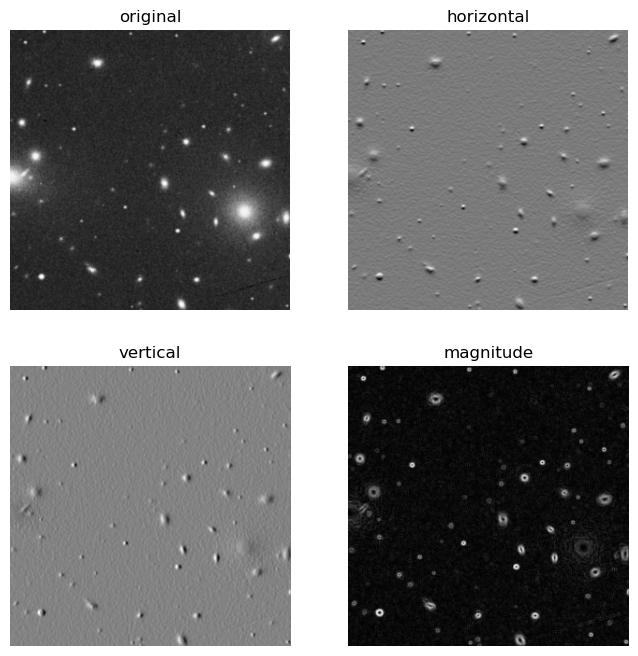

In [11]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

sobel_h = ndimage.sobel(image, 0)  # horizontal gradient
sobel_v = ndimage.sobel(image, 1)  # vertical gradient
magnitude = np.sqrt(sobel_h**2 + sobel_v**2)
magnitude *= 255.0 / np.max(magnitude)  # normalization
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.gray()  # show the filtered result in grayscale
axs[0, 0].imshow(image)
axs[0, 1].imshow(sobel_h)
axs[1, 0].imshow(sobel_v)
axs[1, 1].imshow(magnitude)
titles = ["original", "horizontal", "vertical", "magnitude"]
for i, ax in enumerate(axs.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()

